# 模糊粗糙集和多自编码异常检测
# 摘要
异常检测是一个实际且必需的研究主题，具有广泛的应用范围。然而，现有的异常检测方法在处理具有复杂分布的高维数据时可能面临挑战。在本研究中，我们提出了一种基于多自编码器的异常检测方法，并借助模糊粗糙集。具体来说，首先通过引入核模糊关系来改进自编码器，以增强其在低维空间的表征能力。然后，利用模糊粗糙集的理论，通过融合多视图基于近邻的信息来执行在学习到的低维表征中的异常检测。最后，为了处理复杂数据，多个自编码器被用来协作检测异常，通过整合不同视角的局部异常信息。在选定的数据集上进行的比较实验表明，所提出的方法优于最先进的方法，在AUC-ROC指数方面比经典自编码器提高了5.58%。

# 亮点

• 通过引入核模糊关系提出了一种改进的自编码器（AE）方法。
• 引入了一种基于模糊粗糙集的异常检测方法，通过融合多视角信息来增强鲁棒性。
• 开发了一种基于多个自编码器的异常检测方法，用于处理复杂的分布式数据。

# 1. 引言
异常检测[1, 2]指的是识别与预期行为偏离的异常观察结果，通常被称为异常或离群值。由于这些识别的数据通常在不同应用中提供关键且可操作的信息，如入侵检测[3]、欺诈检测[4]和异常行为分析[5]，异常检测已成为数据挖掘和机器学习领域的一个重要研究主题。
现有的异常检测方法[1]可以分为监督、半监督和无监督方法。监督方法[6]将异常检测视为一个二分类问题。然而，正常和异常样本可能来自复杂的分布。因此，简单地将异常检测视为二分类任务是不合适的。半监督方法[7]利用标记和未标记数据来维持检测异常的能力，因此它们的性能依赖于标签的质量。由于收集和标注标记数据的高成本，无监督方法受到越来越多的关注，并在异常检测中发挥了关键作用。
根据识别异常的内在机制，无监督异常检测方法通常可以分为基于统计的方法[8]、基于邻近的方法[9]、基于重建的方法[10]、基于集成的方法[11]和其他方法[12]。随着深度学习的发展，越来越多的关注被支付给基于重建的方法[13]，这些方法在处理高维数据方面有效。基于重建的方法假设正常样本伴随着小的重建误差，而异常样本难以重建，因此产生更大的误差。Shyu等人[14]提出了一种基于主成分分类器的异常检测方法，该方法基于主成分分析（PCA）重建数据。随着对图像和视频数据处理需求的增加[10]，自编码器（AE）[13]和变分自编码器（VAE）[15]已被用于重建图像以检测异常。Sakurada和Yairi[13]介绍了一种使用AE进行非线性降维的新颖异常检测方法。Kingma和Welling[15]提出了一种用于处理大规模数据的随机变分推理和学习方法。然而，这些方法具有高泛化能力，甚至可以有效地拟合所有样本，包括异常样本，从而导致不令人满意的结果[10]。此外，这些方法大多设计用于数字数据，而实际数据不仅包括数字数据，还包括类别数据和混合数据，这在应用中带来了挑战。
粗糙集理论（RST）[16]，作为处理不精确、不一致和不完整数据的有效数学工具，已在各种领域中找到应用，包括决策支持[17, 18]、属性简化[19, 20]和异常检测[21]。为了处理时空数据，Albanese等人[22]介绍了一种基于粗糙集中的下近似和上近似的粗糙离群集提取方法。从信息论的角度，Jiang等人[23, 24]定义了异常因素并提出了基于信息熵的新颖检测方法。然而，这些方法依赖于等价关系来形成样本颗粒，因此在处理具有数值或混合属性的数据时遇到挑战。为了检测隐藏在数值数据中的异常，引入了邻域关系和模糊关系到粗糙集理论框架中。Yuan等人[25]提出了一种基于多粒化相对熵和邻域粗糙集的新颖异常检测方法。通过定义比例和负区域检测因子，高等人[26]提供了一种基于相对颗粒比例的异常检测方法。Zhang等人[27]利用三元决策理论分析邻域粗糙集中的邻域结构，并介绍了一种基于多邻域离群因子的异构数据异常检测方法。从模糊关系的角度，Yuan等人探索了模糊粗糙集（FRS）的理论，用于异常检测，并分别提出了基于模糊信息熵[28]、模糊粗糙颗粒[29]、多模糊颗粒[30]和模糊粗糙密度[31]的几种异常检测方法。Chen等人[32]介绍了一种基于多尺度模糊颗粒的新颖信息融合模型。Liu等人[33]提出了一种基于马尔可夫随机游走的模糊颗粒异常检测方法。为了处理高维数据，一些研究人员[34, 35]尝试将FRS与其他技术结合使用，例如三元决策[34]和基于距离的模糊粗糙熵[35]。
不幸的是，基于重建的方法集中于生成和重建样本，忽略了在潜在表示中保留局部邻近信息[6]。此外，基于FRS的方法在处理高维数据时遇到挑战，因为样本倾向于分散，而基于重建的方法擅长利用深度学习处理高维数据。因此，将基于重建的方法与基于FRS的方法结合似乎是合适的，以克服这些问题。此外，高维复杂分布可以被视为由多个正常分布组成。在潜在空间中，相似的分布可以以类似的方式重建。因此，AE倾向于注意重建具有相似分布的单一区域，使其难以处理样本可能分布在多个区域的高维复杂分布。为了应对这些挑战，我们提出了一种基于多个自编码器和模糊粗糙集的异常检测方法。总体而言，本文的贡献可以总结为三个方面。
1. 为了增强低维表示能力，将核模糊关系整合到自编码器的损失函数中，以产生具有局部邻近信息的潜在表示。
2. 为了有效地识别低维潜在表示中的异常，提出了一种基于多核模糊粗糙集的无监督异常检测方法，该方法通过使用多尺度视图来减轻不精确颗粒描述的负面影响，从而增强鲁棒性。
3. 为了检测复杂分布中的异常，引入了一种基于多个自编码器的异常检测方法，该方法整合了邻近基异常信息与分布重建，并将复杂数据分解为多个区域以分别适应。此外，进行了全面的实验，并且结果表明，所提出的模型超过了其他最先进的方法，显示了其在高维复杂数据中进行异常检测的潜力。
   
本文接下来的部分结构如下：第二节介绍模糊粗糙集和自编码器的初步知识；第三节详细阐述所提出的多自编码器异常检测方法；第四节展示实验结果和统计意义分析；最后一节总结全文。

# 2. 基础知识
## 2.1. 模糊粗糙集
在模糊粗糙集领域中，相关数据被表示为模糊信息系统，该系统包括一个非空有限的样本集合$U$（称为宇宙），一个非空有限的属性集合$A$，属性的联合$V$，以及从样本到给定属性$a$上对应值的映射函数，表示为$f_a$。因此，模糊信息系统可以正式表示为$FIS=(U,A,V,f)$。
设$U=\{x_1, x_2, \ldots, x_n\}$为非空有限的样本集。如果$A$是从$U$到区间[0,1]的映射，表示为$A: U \to [0,1]$，那么它被称为$U$上的一个模糊集，表示为$\mu_A=(\mu_A(x_1), \mu_A(x_2), \ldots, \mu_A(x_n))$，其中，$\mu_A(x_i)$被称为$A$对$x_i \in U$的隶属函数。
给定$\mu_A^1$和$\mu_A^2$是$U$上的模糊集。对于任意$x \in U$，一些模糊操作如下[36]：
1. 包含：$\mu_A^1(x) \leq \mu_A^2(x) \to \mu_A^1 \subseteq \mu_A^2;$
2. 交集：$(\mu_A^1 \cap \mu_A^2)(x) = \mu_A^1(x) \wedge \mu_A^2(x);$
3. 并集：$(\mu_A^1 \cup \mu_A^2)(x) = \mu_A^1(x) \vee \mu_A^2(x).$
与经典粗糙集不同，FRS使用模糊关系形成颗粒。给定一个模糊信息系统$FIS=(U,A,V,F)$，$U$上的一个模糊关系$R$是一个映射函数，定义为[36]：
$$R:U \times U \mapsto [0,1].$$
对于每一对$(x,y) \in U \times U$，符号$R(x,y)$表示样本$x$和$y$之间的模糊相似度，并遵循以下性质[36]：
$ $
$\begin{aligned}
&(1)\:\text{自反性：} R(x,x)=1;\\
&(2)\:\text{对称性：} R(x,y)=R(y,x);\\
&(3)\:\text{传递性：} R(x,z) \geq \vee_{y \in U}(R(x,y) \wedge R(y,z)).
\end{aligned}$
$ $

在模糊粗糙集（FRS）中，模糊颗粒是知识表达和推理的基本核心概念。对于任何属性子集$B \subseteq A$，由$B$在宇宙$U$上诱导的模糊关系，表示为$R_B$，可以获得，并且在模糊关系$R_{B}$下的模糊颗粒表示为：
$$U/R_B=\{[x_1]_B,[x_2]_B,\ldots,[x_i]_B,\ldots,[x_n]_B\},$$
其中$[x_{i}]_{B}$表示样本$x_{i}$的模糊颗粒，定义为
$$[x_{i}]_{B}=(R_{B}(x_{i},x_{1}),R_{B}(x_{i},x_{2}),\ldots,R_{B}(x_{i},x_{n})).$$
给定一个属性子集$B \subseteq A$，样本之间的模糊关系可以通过一个矩阵来表示，称为模糊关系矩阵：
$$M(R_B)=\begin{bmatrix}
R_B(x_1,x_1) & \cdots & R_B(x_1,x_n) \\
\vdots & \ddots & \vdots \\
R_B(x_n,x_1) & \cdots & R_B(x_n,x_n)
\end{bmatrix}.$$

## 2.2. 自编码器
AE（自编码器）[15] 是一种使用编码器学习低维表示并使用解码器从低维潜在空间重构数据的人工神经网络。在异常检测任务中，AE 的目标是识别具有较大重建误差的样本。AE 的目标函数可以形式化为：

$$\min_{E,D}\sum_{x\in U}\|x-D(E(x))\|_2^2,$$

其中 $E$ 和 $D$ 分别代表编码器和解码器，符号 $\|\cdot\|_2$ 表示 2-范数。

# 3. 本文的方法
## 3.1. 总体框架
在假设神经网络可以准确重构正常样本的基础上，作为代表性的基于重建的方法，自编码器（AE）已成为处理高维数据的一种有效的异常检测方法。它利用神经网络重构样本，并通过重建误差来测量其异常程度。然而，其检测具有复杂分布数据中的异常的能力受到两个方面的限制。一方面，由于缺乏局部邻近信息，AE 可能无法捕捉复杂数据。另一方面，单个AE的表示能力非常有限，特别是对于复杂分布的数据。为了解决这些问题，引入了模糊相似性关系损失来反映局部邻近信息，并提出了一种新颖的多AE异常检测方法，以增强识别能力。从复杂分布数据中识别异常。整体框架可以在图1中示意。

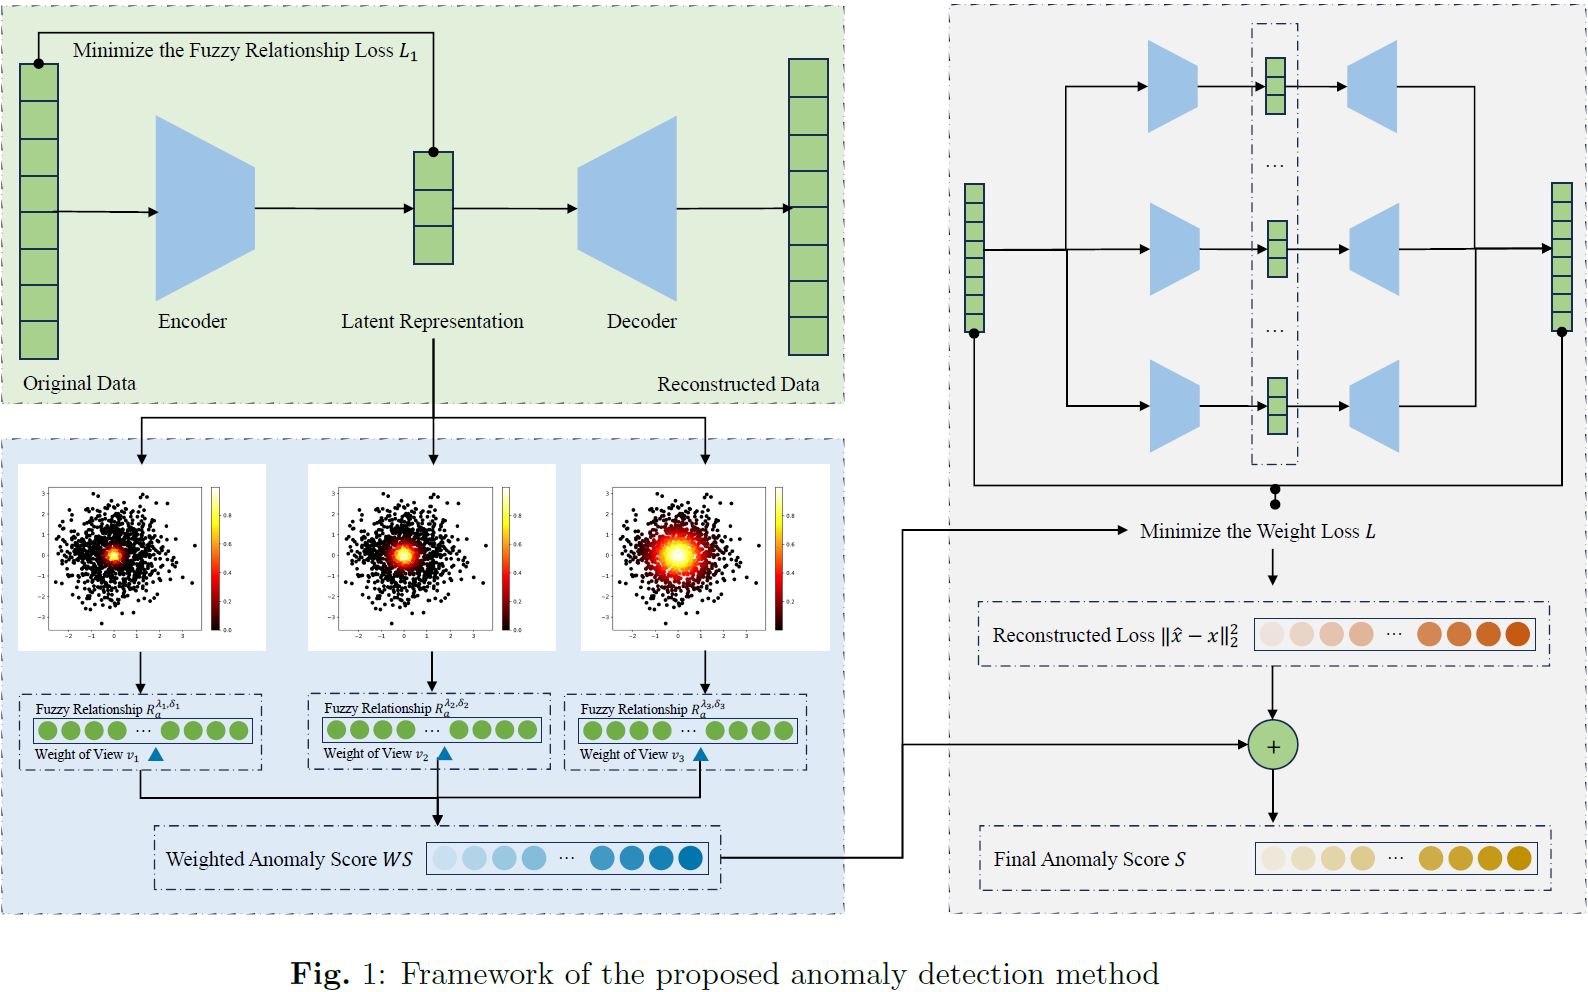

具体来说，原始数据被编码成潜在表示，在此基础上整合了基于多核模糊粗糙集的异常检测方法。然后提取多尺度基于邻近的异常信息，并融合计算加权异常分数。最后，多个自编码器协同重构所有样本，并利用获得的加权异常分数来检测高维复杂分布数据中的异常。


## 3.2. 带有局部邻近信息的改进自编码器
由于缺乏局部邻近信息，AE 在潜在空间中表示复杂分布数据时可能会遇到挑战。如图2（a）所示，原始数据由两个正常样本群集和两个异常群集组成。由于缺乏局部邻近信息，传统AE方法学到的表示只显示了一个异常群集，并且一些异常隐藏在正常群集中。相反，通过引入局部邻近信息，AE的表示得到了极大的改善（见图2（c））。在本研究中，引入了核模糊关系来反映样本的局部邻近信息。

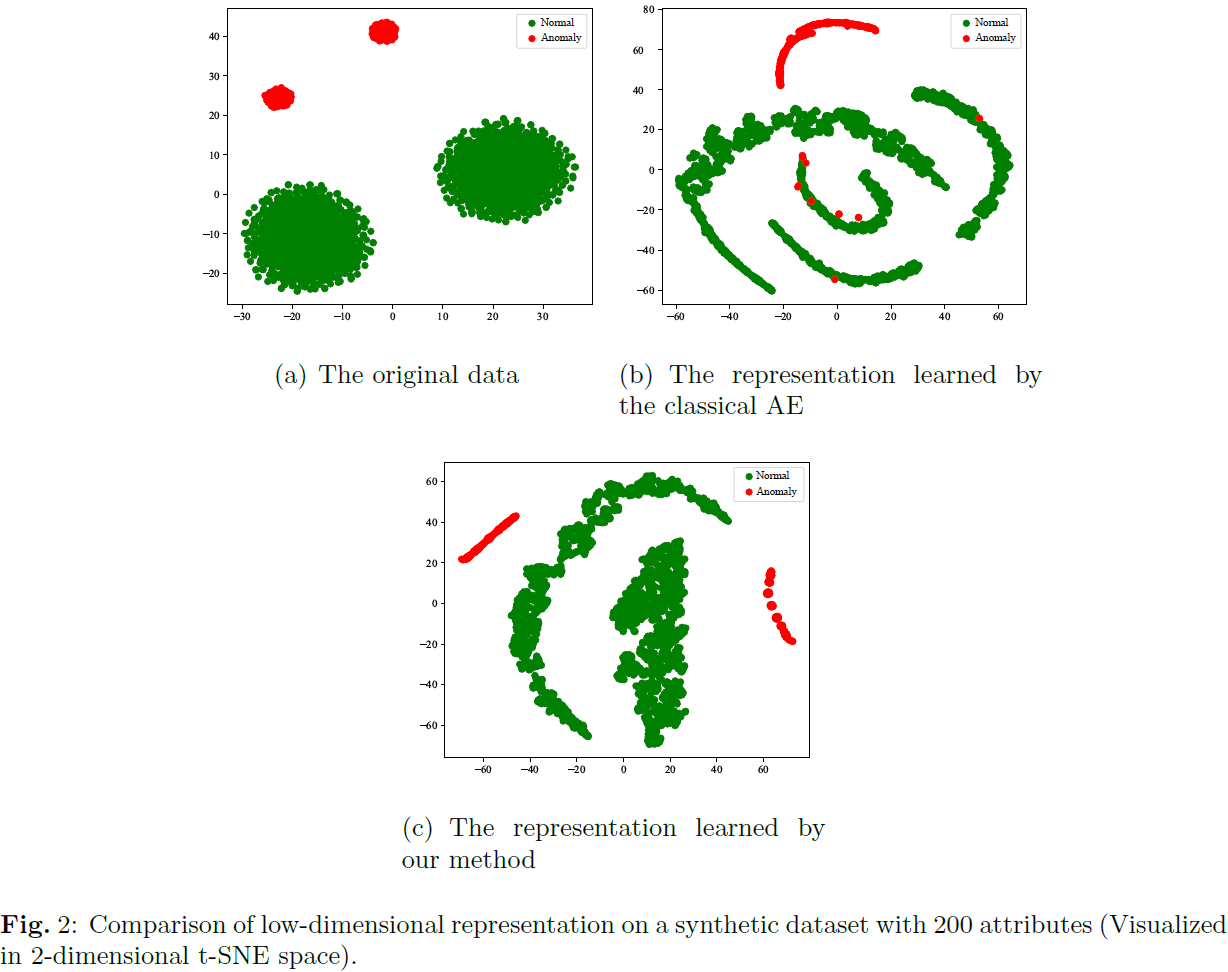

**定义5（核模糊关系）** 给定一个模糊信息系统 $FIS= ( U, A, V, f)$ 和由属性 $a\in A$ 引发的模糊关系 $R_a$，则 $x_{i}$ 和 $x_j$ 之间的核模糊关系表示为：
$$
R_a^{\lambda,\delta}(x_i,x_j)=
\begin{cases}
1-\kappa(x_i,x_j), & \text{若} \kappa(x_i,x_j)\leq\epsilon_a,\\
0, & \text{否则},
\end{cases}
$$
其中 $\kappa(\cdot,\cdot)$ 是核函数，定义为 $\kappa(x_i,x_j)=exp\{-\delta\cdot std(a)\cdot\|f_a(x_i)-f_{a}(x_{j})\|_{2}^{2}\}$，$\epsilon_{a}$ 是通过公式 $\epsilon_a=\lambda\cdot std(a)$ 计算的阈值参数，$std(a)$ 表示属性 $a$ 的标准差，$\lambda$ 是相似性参数，$\delta$ 是可调的邻近参数。
为了获得具有邻近信息的潜在空间，使用了核模糊关系，并且目标函数可以表示为：
$$
\min_EL_1(D)=\sum_{x_i\in U}\sum_{x_j\in U}\|R_A(x_i,x_j)-R_{A'}(E(x_i),E(x_j))\|_2^2,
$$
其中 $R_A(x_i,x_j)$ 表示属性集 $A$ 关于 $x_i$ 和 $x_j$ 之间的模糊关系，$A^\prime$ 表示潜在空间中的属性集。


## 3.3. 基于多核模糊粗糙集的异常检测
改进的自编码器引入了样本之间的模糊关系信息，以增强潜在空间中的低维表示。然而，由于缺乏局部异常信息，使用传统自编码器在复杂分布数据中检测异常是具有挑战性的。模糊粗糙集（FRS）[16]是一种处理具有模糊性、不确定性和不精确性数据的有效方法。通过在潜在空间中引入FRS，可以提取基于邻近的异常信息，并融合到自编码器中，以提高处理复杂分布数据的能力。一些基于FRS的异常检测方法已经被提出[19, 30, 31]，但大多数方法使用单一视角来粒化和描述数据，因此可能在处理复杂分布数据时存在精确性粒度表示不足的问题。为此，通过利用多核模糊关系来表示不同尺度视角下的数据，提出了一种新颖的基于FRS的异常检测方法。

**定义6** 在一个模糊信息系统 $FIS=(U,A,V,f)$ 中，任何样本 $x \in U$ 的异常度可以定义为
$$Score(x)=1-\frac{|[x]_A|}{|U|}$$
其中 $|[x]_{a_i}|$ 是 $x$ 的核模糊颗粒，计算公式为 $|[x]_{a_i}|=\sum_{x_j\in U}R_{a_i}(x,x_j)$。事实上，在单一视角下的粒度表达很难在处理复杂分布数据时实现良好的异常检测。为了生成多视角，根据三西格玛规则，使用三个核心，每一个核心对应一个参数 $\delta$ 的值，分别为1、2和3。特别地，参数 $\delta$ 的较大值表示每个样本关注的小邻域区域。
**定义6（各视角的重要性）** 设 $^1R_a^{\lambda,\delta}\in U\times U$ 是相对于属性 $a \in A$ 的核模糊关系，相应视角的重要性定义为
$$Sig(a,\lambda,\delta)=1-\frac{1}{|U|^2}\sum_{x_i\in U}\sum_{x_i\in U}H(x_i,x_j,a,\lambda,\delta),$$
其中
$$\begin{aligned}H_{k}(x_{i},x_{j},a,\lambda,\delta)=-R_{a}^{\lambda,\delta}(x_{i},x_{j})\log(R_{a}^{\lambda,\delta}(x_{i},x_{j}))-(1-R_{a}^{\lambda,\delta}(x_{i},x_{j}))\log(1-R_{a}^{\lambda,\delta}(x_{i},x_{j})).\end{aligned}$$

**定义7**（每个视角的权重）设 $R_a^{\lambda_1, \delta_1}, R_a^{\lambda_2, \delta_2}$ 和 $R_a^{\lambda_3, \delta_3}$ 是针对属性 $a \in A$ 的三个核模糊关系。第 $k$ 个视角的权重定义为 
\begin{equation}
v(a, \lambda_k, \delta_k) = \frac{Sig(a, \lambda_k, \delta_k)}{\sum_{j=1}^{3}Sig(a, \lambda_j, \delta_j)}.
\end{equation}
**定义8**（融合的核模糊关系）设 $R_a^{\lambda_1, \delta_1}, R_a^{\lambda_2, \delta_2}$ 和 $R_a^{\lambda_3, \delta_3}$ 是针对属性 $a$ 的三个关系。对于样本 $x_i, x_j \in U$，融合的核模糊关系定义为 
\begin{equation}
\widetilde{R_a}(x_i, x_j) = \sum_{k=1}^3 v(R_a^{\lambda_k, \delta_k}) \cdot R_a^{\lambda_k, \delta_k}(x_i, x_j).
\end{equation}
每个视角的重要性通过计算不同核模糊相似度的信息熵平均值来确定。具体来说，样本对的核模糊相似度趋近于0.5意味着所有样本彼此无法区分，因此，所有样本的平均信息熵接近1。因此，在这种情况下，相应的重要性接近0，表明这个视角对异常检测的贡献非常有限。进一步地，使用规范化操作符计算权重，使核模糊关系落在0到1的范围内。
\noindent \textbf{定义9}（加权异常分数）设 $FIS=(U,A,V,f)$ 为一个模糊信息系统。对于任何样本 $x \in U$，$x$ 的异常分数定义为
\begin{equation}
\begin{aligned}
WS(x)&=1-{\frac{|\widetilde{[x]}_{A}|}{|U|}}\\
&=1-\prod_{a \in A}{\frac{|\widetilde{[x]}_{a}|}{|U|}},
\end{aligned}
\end{equation}
其中 $|\widetilde{[x]}_{a_i}|$ 是 $x$ 的核模糊颗粒，定义为
\begin{equation}
\begin{aligned}
\widetilde{[x]}_{a_i} = (\widetilde{R_{a_i}}(x,x_1), \widetilde{R_{a_i}}(x,x_2), ..., \widetilde{R_{a_i}}(x,x_{|U|})),
\end{aligned}
\end{equation}
并且 $|\widetilde{[x]}_{a_i}| = \sum_{x_j \in U} R_{a_i}(x,x_j) $ 表示 $\widetilde{[x]}_{a_i}$ 的核模糊颗粒的基数。
根据定义，每个样本的异常分数由每个属性诱导的模糊颗粒确定。模糊颗粒的基数较小意味着样本是异常的可能性较高。基于所提出的异常分数度量，开发了一种基于多核FRS的异常检测方法。识别异常的过程在算法1中详细描述。

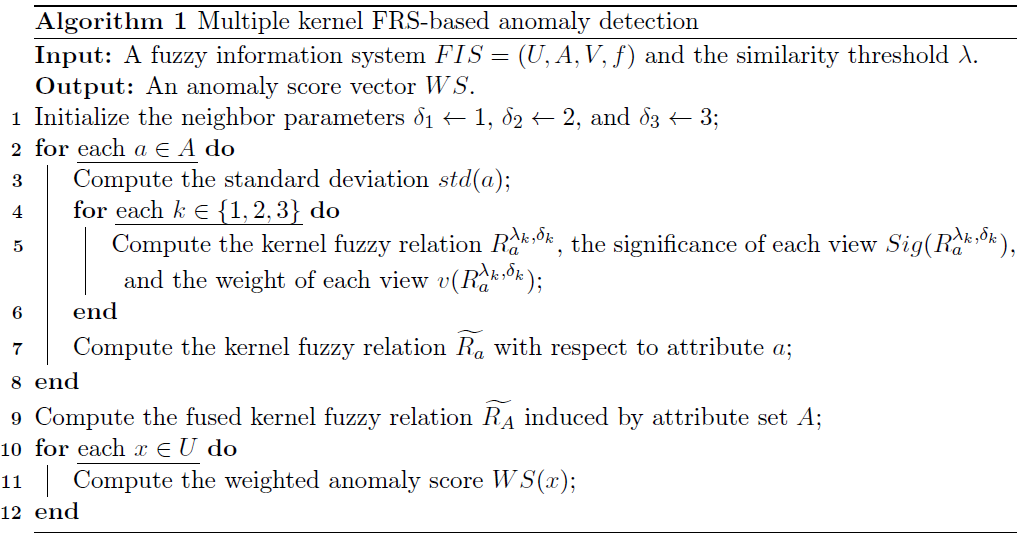

初始时，算法1计算每个属性的标准差。对于每个视图，计算每个属性的核模糊关系、视图重要性和权重。然后，通过组合不同属性引起的核模糊关系，获得样本之间的融合模糊关系，并计算每个样本的异常分数。
考
虑一个由$|A|$个属性描述的$|U|$个样本的数据集，计算核模糊关系和每个视图的权重的时间复杂度为$O(|U^2|)$，而由属性集A引入的融合模糊关系的时间复杂度为$O(|A||U^2|)$。对于每个样本，计算其异常分数需要$O(|U|)$的时间。因此，算法1的整体时间复杂度为$O(|A||U^2|)$，空间复杂度为$O(|U|^2)$。

## 3.4. 基于多个自动编码器的异常检测
改进的自动编码器可以提供更好的数据低维表示，而多个内核的模糊粗糙集进一步融合了多尺度邻近信息来检测异常。然而，面对复杂的分布式数据，特别是具有不同分布的多类数据，单个自动编码器在异常检测方面的能力仍然有限。为了解决这个问题，集成多个自动编码器以提高检测复杂分布式数据中异常的能力。具体来说，通过由模糊粗糙集基于异常分数和重建误差组成的加权损失函数，微调多个改进的自动编码器。随后，将复杂的分布式数据分解为一些易于处理的区域以分别处理。最后，通过结合训练的多个自动编码器的重建误差和获得的基于模糊粗糙集的异常分数来确定异常分数。

为了获得样本之间平滑插值的结构化表示，所提出的基于自动编码器的方法受到变分自动编码器思想的启发，通过优化重建损失和KL散度损失来重建所有样本。考虑到邻近信息，自动编码器的损失函数可以表示为：


$$
    \begin{aligned}
            \min_{\theta, \phi} \sum_{x_i \in U} (D_{KL} (q_\phi(z|x_i)||p_\theta(z)) -  \mathbb{E}_{q_\phi (z|x_i)}  [log \; p_\theta (x_i|z)] ) + \sum_{i=1}^{|U|} \sum_{j=1}^{|U|} \Vert R_A (x_i, x_j) - R_A(z_i, z_j) \Vert _2^2,
    \end{aligned}
$$


在其中 $z$ 是潜在变量，特别是，$z_i$ 对应于样本 $x_i$ 的潜在变量。为了进一步增强重构能力，有必要设计一个损失函数，使得多个自编码器（AEs）能够协作地适应复杂分布的各个组成部分。为简洁起见，损失函数大致表述为
$$
\begin{aligned}
L(\theta_1,..., \theta_n;\phi_1,...,\phi_n) =\frac{1}{n}\sum_{k=1}^n ( \sum_{x_i \in U} D_{KL} (q_{\phi_k}(z|x_i)||p_{\theta_k}(z))) +  \Vert l(\theta_1,..., \theta_n;\phi_1,...,\phi_n) \Vert_{-\infty},
\end{aligned}
$$
其中 $\theta_k$ 和 $\phi_k$ 分别表示第 $k$ 个编码器和解码器训练的分布参数，$\Vert \cdot \Vert_{-\infty}$ 表示 $-\infty$-范数运算符，$l$ 是损失向量，计算方式为
$$
\begin{aligned}
l_k(\theta_1,..., \theta_n;\phi_1,...,\phi_n) = \sum_{x_i \in U} (-\mathbb{E}_{q_{\phi_k} (z^k|x_i)}  [WS(x_i) \cdot \log \; p_{\theta_k} (x_i|z^k)]) \\ + \sum_{i=1}^{|U|}\sum_{j=1}^{|U|} \Vert R_A (x_i, x_j) - R_A(z_i^k, z_j^k) \Vert _2^2,
\end{aligned}
$$
其中 $z_i^k$ 表示由第 $k$ 个AE重构的第 $i$ 个样本的潜在变量，$n$ 是AEs的数量，这由损失函数的值适应性确定。
如图 \ref{idea} 所示，单个AE倾向于将数据重构成一个连通区域，而所提出的方法显示了将数据分解成多个区域的能力，有助于重构复杂分布的数据。

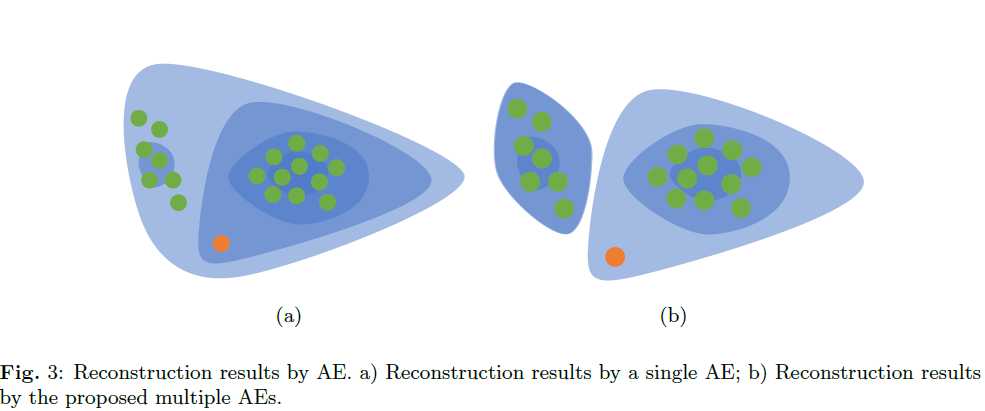


通过优化损失函数训练AEs，显著增强了重构复杂正态分布的表征能力。如图 3 所示，展示了由两个AEs重构的一些样本构成的合成数据集，颜色表示与最小重构损失相关的AE。如图3，显示，显然 $AE_2$ 专注于重构位于簇中心的样本，而 $AE_1$ 更关注边界样本，防止在复杂分布中的误分类。为了准确评估每个样本的异常程度，引入了融合异常得分，它综合了 FRS 的加权异常得分和多个 AE 的重建误差。

为了准确评估每个样本的异常程度，引入了一个融合异常分数，该分数整合了FRS的加权异常分数和多个AEs的重构误差。
**定义9**（融合异常分数）设 $FIS=(U,A,V,f)$ 为一个模糊信息系统。对于任何样本 $x \in U$，$x$ 的异常分数定义为
$$
\begin{aligned}
S(x) = \mathcal{N}(\Vert \hat{x} - x \Vert_2^2) + WS(x),
\end{aligned}
$$
其中 $\hat{x}$ 表示 $x$ 的重构样本，$\mathcal{N}$ 表示归一化操作符，而 $WS(x)$ 代表加权异常分数。
通过整合训练好的多个AEs，可以重构隐藏在高维复杂分布中的样本。算法首先基于损失函数 $L_1$ 训练一个AE，以获得低维表示，然后在此基础上执行算法1描述的基于FRS的异常检测方法。接着，多个AEs协作训练并拟合给定数据。在训练过程中，AEs的数量可以适应性地确定。最终通过融合加权异常分数和重构误差确定一个异常分数向量。

# 4. 实验结果和分析

## 4.1. 算法流程图
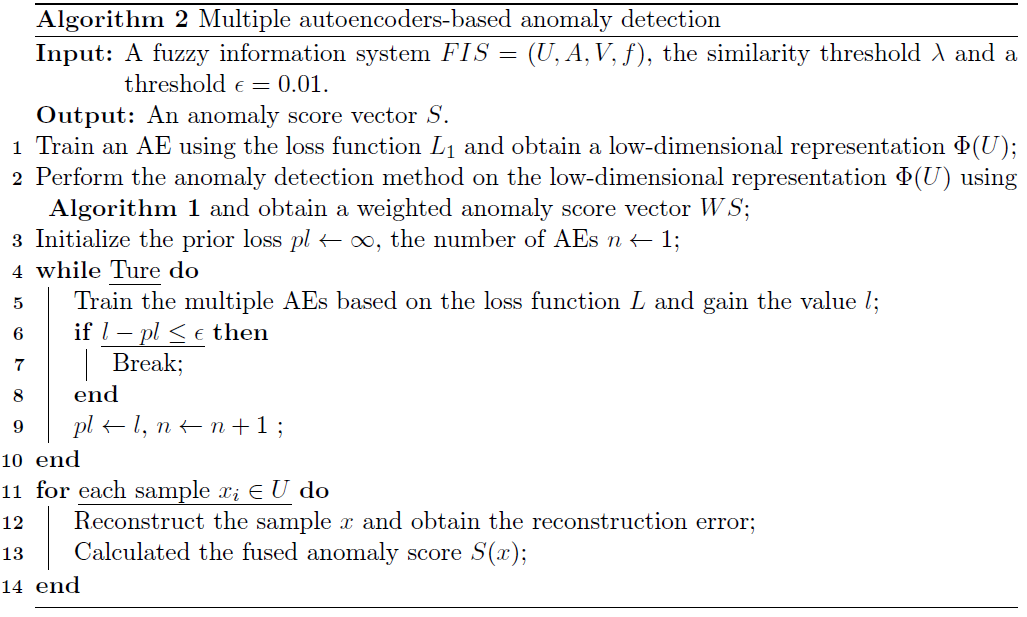

## 4.2. 实验数据
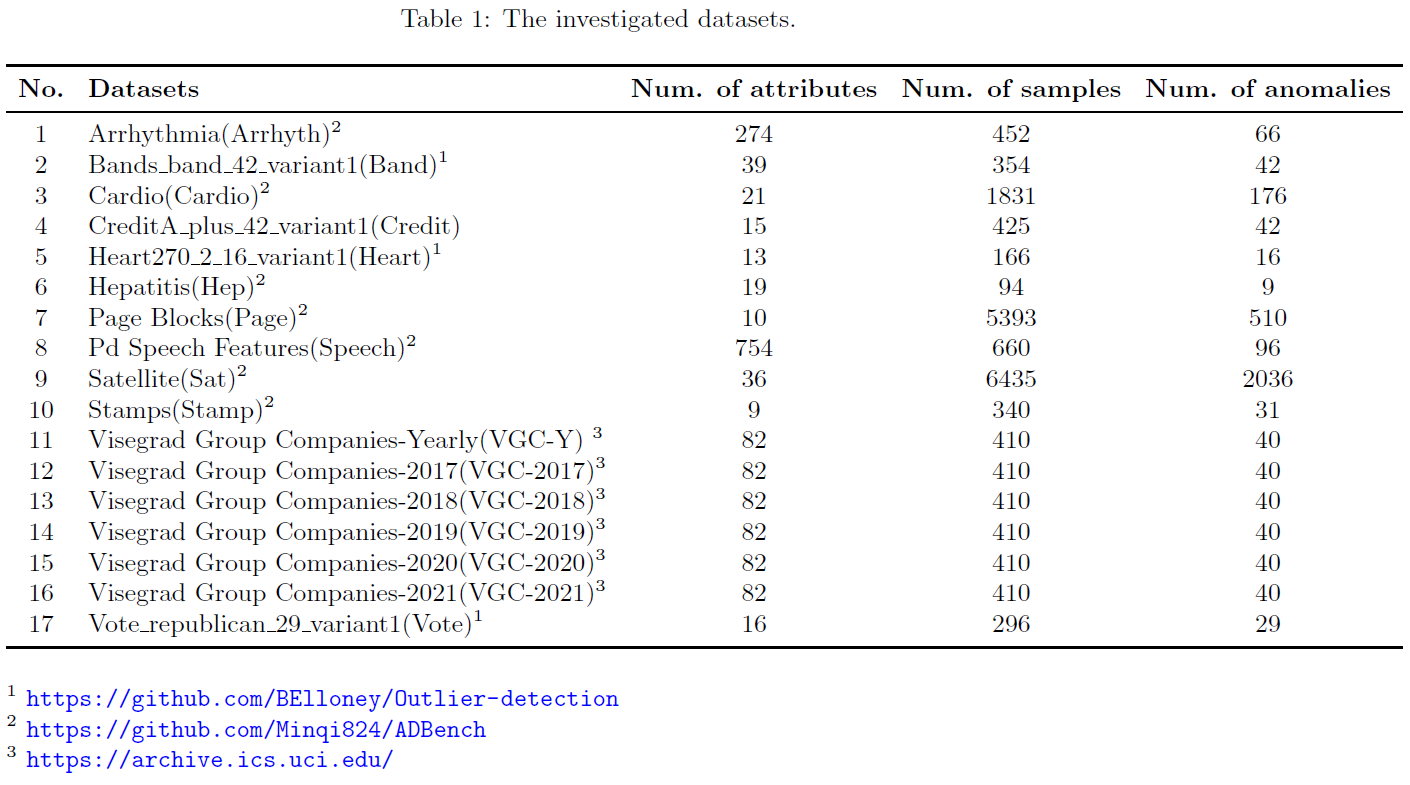

## 4.3. 实验结果
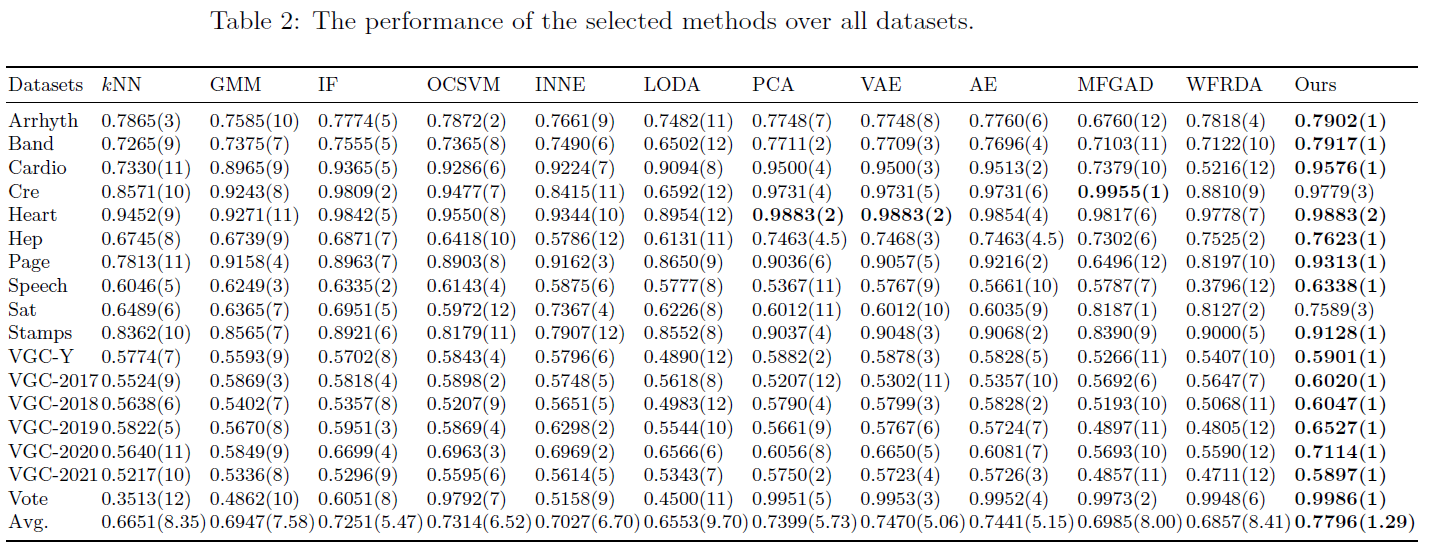

## 4.4. 实验分析

在此研究中，首先进行了广泛的实验，验证了所提出方法在异常检测方面的有效性。这包括消融实验和参数敏感性分析。所有代码使用Python 3.9实现，并在配备Intel(R) Core(TM) i7-10700 CPU和32 GB RAM的Ubuntu 20.04.1操作系统的计算机上执行。

实验涉及17个公共数据集，其中数据集来自UCI机器学习库，并进行了预处理以便进行异常检测。这些数据集的详细信息如下：包括属性数量、正常样本数和异常样本数等。
使用ROC曲线和AUROC作为评估指标，实验表明，所提出的方法相比其他先进的异常检测方法具有更好的性能。此外，采用Friedman分析和Nemenyi检验等统计显著性分析进一步证实了所提出方法的有效性。

特别地，所提出的方法整合了多个自编码器（AEs）和基于模糊粗糙集的方法，有效地识别高维复杂分布中的异常。此外，所提出的方法通过多视图融合策略增强了模型的鲁棒性，并通过适应性地确定AEs的数量，提高了处理复杂数据的能力。通过对所有选择的数据集平均，所提出的方法表现出比单一视图方法（如$k$NN、GMM、OCSVM等）更高的性能改善，进一步突出了其优越性。

在未来的工作中，探索更有效的多视图异常检测融合策略和将模糊粗糙集基础的异常检测应用于半监督数据将是有价值的方向。

# 5. 结论

在实际应用中，可用数据通常具有多个属性并表现出复杂的分布，这对现有的异常检测方法提出了重大挑战。在本研究中，我们将核模糊关系的概念整合到自编码器中，以提高对高维数据的表征能力，并提出了一种基于多核模糊粗糙集的方法，用于识别获得的低维表示中的异常。此外，为了有效地从复杂分布的数据中检测异常，还通过联合最小化加权重构误差来训练了多个AEs。广泛的比较实验以及统计显著性分析表明，所提出的方法优于其他最先进的异常检测方法。未来，值得探索更有效的融合策略，用于多视图异常检测，并应用基于模糊粗糙集的异常检测于半监督数据。

# 6. 参考文献

[1] G. Pang, C. Shen, L. Cao, A.V.D. Hengel, 深度学习在异常检测中的应用：综述, ACM 计算调查, 54 (2021) 文章 38。

[2] A. Boukerche, L. Zheng, O. Alfandi, 异常检测：方法、模型和分类, ACM 计算调查, 53 (2020) 文章 55。

[3] W. Wu, C. Song, J. Zhao, Z. Xu, 针对工业网络物理系统的异常检测的物理信息门控循环图注意单元网络, 信息科学, 629 (2023) 618-633。

[4] M. Behdad, L. Barone, M. Bennamoun, T. French, 在欺诈检测中的自然启发式技术, 系统、人类和控制论 C 应用评论, 42 (2012) 1273-1290。

[5] J. Liu, T. Li, Z. Yuan, W. Huang, P. Xie, Q. Huang, 基于符号聚合近似的危险驾驶行为检测的数据融合模型, 信息科学, 609 (2022) 626-643。

[6] S. Han, X. Hu, H. Huang, M. Jiang, Y. Zhao, Adbench: 异常检测基准, 在：神经信息处理系统会议（NeurIPS）的论文集, 2022, pp. 32142-32159。

[7] X. Meng, S. Wang, Z. Liang, D. Yao, J. Zhou, Y. Zhang, 动态通信网络中的半监督异常检测, 信息科学, 571 (2021) 527-542。

[8] G. Steinbuss, K. Böhm, 使用真实合成数据的非监督异常检测基准, ACM 知识发现与数据传输, 15 (2021) 文章 65。

[9] F. Angiulli, C. Pizzuti, 高维空间中的快速异常检测, 在：数据挖掘和知识发现的原则论文集, 2002, pp. 15-27。

[10] D. Gong, L. Liu, V. Le, B. Saha, M.R. Mansour, S. Venkatesh, A.v.d. Hengel, 记忆正常性以检测异常：记忆增强的深度自编码器用于无监督异常检测, 在：IEEE/CVF 国际计算机视觉会议（CVPR）的论文集, 
2019, pp. 1705-1714。

[11] T. Pevný, Loda: 轻量级在线异常检测器, 机器学习, 102 (2016) 275-304。

[12] B. Scholkopf, J.C. Platt, J. Shawe-Taylor, A.J. Smola, R.C. Williamson, 估算高维分布的支持, 神经计算, 13 (2001) 1443-1471。

[13] M. Sakurada, T. Yairi, 使用自编码器进行异常检测的非线性降维, 在：机器学习用于传感器数据分析研讨会 MLSDA 2014 第二届研讨会的论文集, 计算机协会, 2014, pp. 4–11。

[14] M.-L. Shyu, S.-C. Chen, K. Sarinnapakorn, L. Chang, 基于主成分分类器的新颖异常检测方案, 在：IEEE 数据挖掘新方向和基础研讨会的论文集, IEEE 出版社, 2003, pp. 172-179。

[15] D.P. Kingma, M. Welling, 自编码变分贝叶斯, arXiv 预印本 arXiv:1312.6114, (2013)。

[16] Z. Pawlak, J. Grzymala-Busse, R. Slowinski, W. Ziarko, 粗糙集, ACM 通讯, 38 (1995) 88–95。

[17] X. Zhang, D. Miao, 在属性简化中基于粒度计算的定量/定性区域变化不确定性/确定性：基于粒度计算的比较区域变化分析, 信息科学, 334-335 (2016) 174-204。

[18] X. Zhang, H. Yao, Z. Lv, D. Miao, 针对层次和系统性的类特定信息度量和属性简化, 信息科学, 563 (2021) 196-225。

[19] Z. Yuan, H. Chen, T. Li, Z. Yu, B. Sang, C. Luo, 基于模糊粗糙集的混合数据无监督属性简化, 信息科学, 572 (2021) 67-87。

[20] T.Y. Yin, H.M. Chen, Z. Yuan, T.R. Li, K.Y. Liu, 抗噪声的多标签模糊邻域粗糙集用于特征子集选择, 信息科学, 621 (2023) 200-226。

[21] B. Chen, X. Zhang, Z. Yuan, 基于距离粒度和条件熵的不完整区间值决策系统中的二维改进属性简化, 信息科学, 657 (2024) 119910。

[22] A. Albanese, S.K. Pal, A. Petrosino, 粗糙集、核集和时空异常检测, IEEE 知识与数据工程交易, 26 (2014) 194-207。

[23] F. Jiang, Y.F. Sui, C.G. Cao, 基于粗糙集的信息熵的异常检测方法, 专家系统应用, 37 (2010) 6338-6344。

[24] F. Jiang, H. Zhao, J. Du, Y. Xue, Y. Peng, 基于近似精度熵的异常检测, 国际机器学习与网络学习, 10 (2019) 2483-2499。

[25] Z. Yuan, H.M. Chen, T.R. Li, X.Y. Zhang, B.B. Sang, 多粒度相对熵在邻域系统中的混合属性异常检测, IEEE 系统、人类和网络论 - 系统, 52 (2022) 5175-5187。

[26] L. Gao, M. Cai, Q. Li, 异构数据中基于相对粒度比的异常检测方法, 信息科学, 622 (2023) 710-731。

[27] X. Zhang., Z. Yuan, D. Miao, 使用三维邻域特征区域和相应的融合测量进行的异常检测, IEEE 知识与数据工程交易, 提前获取, 9月 (2023), doi: 10.1109/TKDE.2023.3312108。

[28] Z. Yuan, H.M. Chen, T.R. Li, B.B. Sang, S. Wang, 基于模糊信息熵的混合特征异常检测的自适应方法, 模糊系统集, 421 (2021) 1-28。

[29] Z. Yuan, H.M. Chen, T.R. Li, B.B. Sang, S. Wang, 基于模糊粗糙粒子的混合属性数据中的异常检测, IEEE 网络, 52 (2022) 8399-8412。

[30] Z. Yuan, B. Chen, J. Liu, H. Chen, D. Peng, P. Li, 基于加权模糊粗糙密度的异常检测, 应用软件计算, 134 (2023) 109995。

[31] Z. Yuan, H. Chen, C. Luo, D. Peng, MFGAD: 多模糊粒子异常检测, 信息融合, 95 (2023) 17-25。

[32] B. Chen, Y. Li, D. Peng, H. Chen, Z. Yuan, 融合多尺度模糊信息以检测异常, 信息融合, 103 (2024) 102133。

[33] C. Liu, Z. Yuan, B. Chen, H. Chen, D. Peng, 使用马尔可夫随机行走的模糊粒度异常检测, 信息科学, 646 (2023) 119400。

[34] X. Tan, C. Gao, J. Zhou, J. Wen, 基于三向决策的共同异常检测, 国际近似推理期刊, 160 (2023) 108971。

[35] S. Wang, Z. Yuan, C. Luo, H. Chen, D. Peng, 利用模糊粗糙熵检测异常, 国际近似推理期刊, 165 
(2024) 109087。

[36] D. Dubois, H. Prade, 模糊粗糙集和模糊粗糙集, 国际通用系统期刊, 17 (1990) 191-209。

[37] Z. You, L. Cui, Y. Shen, K. Yang, X. Lu, Y. Zheng, X. Le, 一个用于多类异常检测的统一模型, 在：神经信息处理系统会议（NeurIPS）的论文集, 2022, pp. 4571-4584。

[38] G.O. Campos, A. Zimek, J. Sander, R. Campello, B. Micenkova, E. Schubert, I. Assent, M.E. Houle, 关于无监督异常检测的评估：测量方法、数据集和实证研究, 数据挖掘与知识发现, 30 (2016) 891-927。

[39] F.T.Liu, K.M.Ting, Z.-H.Zhou, 隔离森林, 在：国际数据挖掘会议, 2008, pp. 413-422。

[40] T.R. Bandaragoda, K.M. Ting, D. Albrecht, F.T. Liu, Y. Zhu, J.R. Wells, 基于最近邻集成的隔离异常检测, 计算智能, 34 (2018) 968-998。

[41] Y. Zhao, Z. Nasrullah, Z. Li, PyOD: 一个用于可扩展异常检测的 Python 工具箱, 机器学习研究期刊 20 (96) (2019) 91–97。

[42] J. Demšar, 多数据集上分类器的统计比较, 机器学习研究期刊, 7 (2006) 1-30。

# Reference

[1] G. Pang, C. Shen, L. Cao, A.V.D. Hengel, Deep learning for anomaly detection: A
review, ACM Comput. Surv., 54 (2021) Article 38.

[2] A. Boukerche, L. Zheng, O. Alfandi, Outlier detection: methods, models, and classification,

ACM Comput. Surv., 53 (2020) Article 55.
[3] W. Wu, C. Song, J. Zhao, Z. Xu, Physics-informed gated recurrent graph attention
unit network for anomaly detection in industrial cyber-physical systems, Inf. Sci., 629
(2023) 618-633.

[4] M. Behdad, L. Barone, M. Bennamoun, T. French, Nature-Inspired Techniques in the
Context of Fraud Detection, Trans. Syst., Man, Cybern. C, Appl. Rev., 42 (2012)
1273-1290.

[5] J. Liu, T. Li, Z. Yuan, W. Huang, P. Xie, Q. Huang, Symbolic aggregate approximation
based data fusion model for dangerous driving behavior detection, Inf. Sci., 609 (2022)
626-643.

[6] S. Han, X. Hu, H. Huang, M. Jiang, and Y. Zhao, Adbench: Anomaly Detection
Benchmark, in: Proc. of the Conf. on Neural Information Processing Systems
(NeurIPS), 2022, pp. 32142-32159.

[7] X. Meng, S. Wang, Z. Liang, D. Yao, J. Zhou, Y. Zhang, Semi-supervised anomaly
detection in dynamic communication networks, Inf. Sci., 571 (2021) 527-542.

[8] G. Steinbuss, K. B¨ohm, Benchmarking Unsupervised outlier detection with realistic
synthetic data, ACM Trans. Knowl. Discov. Data, 15 (2021) Article 65.

[9] F. Angiulli, C. Pizzuti, Fast outlier detection in high dimensional spaces, in: Prin. of
Data Mining and Knowledge Discovery, 2002, pp. 15-27.

[10] D. Gong, L. Liu, V. Le, B. Saha, M.R. Mansour, S. Venkatesh, A.v.d. Hengel, Memorizing
normality to detect anomaly: Memory-augmented deep autoencoder for unsupervised
anomaly detection, in: Proc. of the IEEE/CVF Int’l Conf. on Computer
Vision (CVPR), 2019, pp. 1705-1714.

[11] T. Pevn´y, Loda: Lightweight on-line detector of anomalies, Mach. Learn., 102 (2016)
275-304.

[12] B. Scholkopf, J.C. Platt, J. Shawe-Taylor, A.J. Smola, R.C. Williamson, Estimating
the support of a high-dimensional distribution, Neural Comput., 13 (2001) 1443-1471.

[13] M. Sakurada, T. Yairi, Anomaly Detection Using Autoencoders with Nonlinear Dimensionality
Reduction, in: Proc. of the MLSDA 2014 2nd Workshop on Machine
Learning for Sensory Data Analysis, Association for Computing Machinery, 2014, pp.
4–11.

[14] M.-L. Shyu, S.-C. Chen, K. Sarinnapakorn, L. Chang, A novel anomaly detection
scheme based on principal component classifier, in: Proc. of the IEEE Foundations
and New Directions of Data Mining Workshop, IEEE Press, 2003, pp. 172-179.

[15] D.P. Kingma, M. Welling, Auto-encoding variational bayes, arXiv preprint
arXiv:1312.6114, (2013).

[16] Z. Pawlak, J. Grzymala-Busse, R. Slowinski, W. Ziarko, Rough sets, Commun. ACM,
38 (1995) 88–95.

[17] X. Zhang, D. Miao, Quantitative/qualitative region-change uncertainty/certainty in
attribute reduction: Comparative region-change analyses based on granular computing,
Inf. Sci., 334-335 (2016) 174-204.

[18] X. Zhang, H. Yao, Z. Lv, D. Miao, Class-specific information measures and attribute
reducts for hierarchy and systematicness, Inf. Sci., 563 (2021) 196-225.

[19] Z. Yuan, H. Chen, T. Li, Z. Yu, B. Sang, C. Luo, Unsupervised attribute reduction
for mixed data based on fuzzy rough sets, Inf. Sci., 572 (2021) 67-87.

[20] T.Y. Yin, H.M. Chen, Z. Yuan, T.R. Li, K.Y. Liu, Noise-resistant multilabel fuzzy
neighborhood rough sets for feature subset selection, Inf. Sci., 621 (2023) 200-226.

[21] B. Chen, X. Zhang, Z. Yuan, Two-dimensional improved attribute reductions based
on distance granulation and condition entropy in incomplete interval-valued decision
systems, Inf. Sci., 657 (2024) 119910.

[22] A. Albanese, S.K. Pal, A. Petrosino, Rough sets, kernel set, and spatiotemporal outlier
detection, IEEE Trans. Knowl. Data Eng., 26 (2014) 194-207.

[23] F. Jiang, Y.F. Sui, C.G. Cao, An information entropy-based approach to outlier detection
in rough sets, Expert Syst. Appl., 37 (2010) 6338-6344.

[24] F. Jiang, H. Zhao, J. Du, Y. Xue, Y. Peng, Outlier detection based on approximation
accuracy entropy, Int. J. Mach. Learn. Cyb., 10 (2019) 2483-2499.

[25] Z. Yuan, H.M. Chen, T.R. Li, X.Y. Zhang, B.B. Sang, Multigranulation Relative
entropy-based mixed attribute outlier detection in neighborhood systems, IEEE Trans.
Syst. Man Cybern. -Syst., 52 (2022) 5175-5187.

[26] L. Gao, M. Cai, Q. Li, A relative granular ratio-based outlier detection method in
heterogeneous data, Inf. Sci., 622 (2023) 710-731.

[27] X. Zhang., Z. Yuan, and D. Miao, Outlier detection using three-way neighborhood
characteristic regions and corresponding fusion measurement. IEEE Trans. Knowl.
Data Eng., Early Access, Sep. (2023), doi: 10.1109/TKDE.2023.3312108.

[28] Z. Yuan, H.M. Chen, T.R. Li, J. Liu, S. Wang, Fuzzy information entropy-based
adaptive approach for hybrid feature outlier detection, Fuzzy Sets Syst., 421 (2021)
1-28.

[29] Z. Yuan, H.M. Chen, T.R. Li, B.B. Sang, S. Wang, Outlier detection based on fuzzy
rough granules in mixed attribute data, IEEE T. Cybern., 52 (2022) 8399-8412.

[30] Z. Yuan, B. Chen, J. Liu, H. Chen, D. Peng, P. Li, Anomaly detection based on
weighted fuzzy-rough density, Appl. Soft. Comput., 134 (2023) 109995.

[31] Z. Yuan, H. Chen, C. Luo, D. Peng, MFGAD: Multi-fuzzy granules anomaly detection,
Inf. Fusion, 95 (2023) 17-25.

[32] B. Chen, Y. Li, D. Peng, H. Chen, Z. Yuan, Fusing multi-scale fuzzy information to
detect outliers, Inf. Fusion, 103 (2024) 102133.

[33] C. Liu, Z. Yuan, B. Chen, H. Chen, D. Peng, Fuzzy granular anomaly detection using
Markov random walk, Inf. Sci., 646 (2023) 119400.

[34] X. Tan, C. Gao, J. Zhou, J. Wen, Three-way decision-based co-detection for outliers,
Int. J. Approx. Reasoning, 160 (2023) 108971.

[35] S. Wang, Z. Yuan, C. Luo, H. Chen, D. Peng, Exploiting fuzzy rough entropy to detect
anomalies, Int. J. Approx. Reasoning, 165 (2024) 109087.

[36] D. Dubois, H. Prade, Rough fuzzy sets and fuzzy rough sets, Int. J. Gen. Syst., 17
(1990) 191-209.

[37] Z. You, L. Cui, Y. Shen, K. Yang, X. Lu, Y. Zheng, X. Le, A unified model for
multi-class anomaly detection,in: Proc. of the Conf. on Neural Information Processing
Systems (NeurIPS), 2022, pp. 4571-4584.

[38] G.O. Campos, A. Zimek, J. Sander, R. Campello, B. Micenkova, E. Schubert, I.
Assent, M.E. Houle, On the evaluation of unsupervised outlier detection: measures,
datasets, and an empirical study, Data Min. Knowl. Discov., 30 (2016) 891-927.

[39] F.T.Liu,K.M.Ting,and Z.-H.Zhou, Isolation forest, in: Int’l Conf. on Data Mining,
2008, pp. 413-422.

[40] T.R. Bandaragoda, K.M. Ting, D. Albrecht, F.T. Liu, Y. Zhu, J.R. Wells, Isolationbased
anomaly detection using nearest-neighbor ensembles, Computational Intelligence,
34 (2018) 968-998.

[41] Y. Zhao, Z. Nasrullah, Z. Li, PyOD: A Python toolbox for scalable outlier detection,
J. Mach. Learn. Res. 20 (96) (2019) 91–97.

[42] J. Demˇsar, Statistical comparisons of classifiers over multiple data sets, J. Mach.
Learn. Res., 7 (2006) 1-30.